In [ ]:
import os
import datetime
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api as sm
from scipy import fftpack
import scipy.io as sio
from scipy import fft
from scipy import arange
from statsmodels import api as sm
from scipy import signal
plt.style.use('seaborn-poster')
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack
%matplotlib inline

In [ ]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.sans-serif'] = ['Lucida Console']

In [ ]:
def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax) 
    #text = f"{xmax=}, {ymax=}, (period: {1./xmax} days)" #Eh, Colab has Python 3.6 ... 
    text = f"x={xmax:.3f}, y={ymax:.3f}, (period: {(1./xmax):.2f} days)"
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax),  xytext=(0.94, 0.96), **kw)



In [ ]:
def low_pass(s, threshold=2e4):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-3 / s.size)
    display(1/frequencies)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [ ]:
df = pd.read_csv('result_CA4000431_000000681000011800.csv')
df.columns = [c.lower() for c in df.columns]
df.fscl_wk_end_dt = pd.to_datetime(df.fscl_wk_end_dt)
df.set_index('fscl_wk_end_dt', inplace = True)
orig_df = df.copy()
df = df[['ty_div_avg_unit_price']]
#df['norm_avg_price'] = df['ty_div_avg_unit_price'] - np.mean(df['ty_div_avg_unit_price'])
df

,ty_div_avg_unit_price
fscl_wk_end_dt,
2018-01-06,3.418555
2018-01-13,3.420692
2018-01-20,3.874394
2018-01-27,3.911574
2018-02-03,4.275081
...,...
2021-11-27,4.340388
2021-12-04,4.423389
2021-12-11,4.360195


In [ ]:
np.mean(df['ty_div_avg_unit_price'])

3.8372628686703334

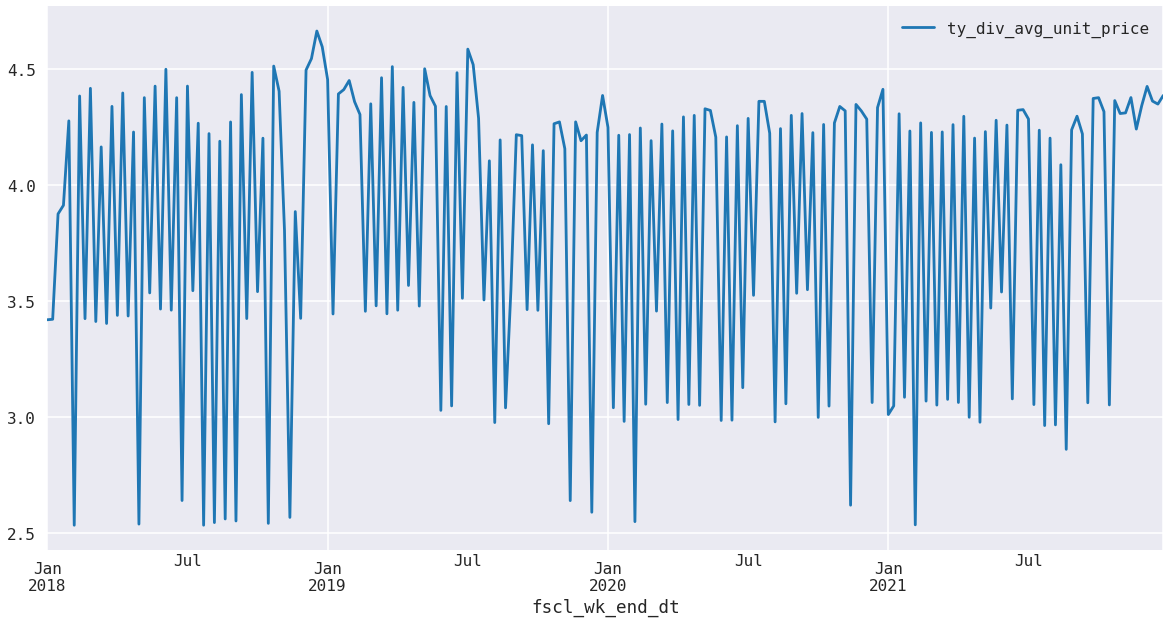

In [ ]:
df.plot(figsize=(20,10))

Text(0, 0.5, 'Spectrum Amplitude')

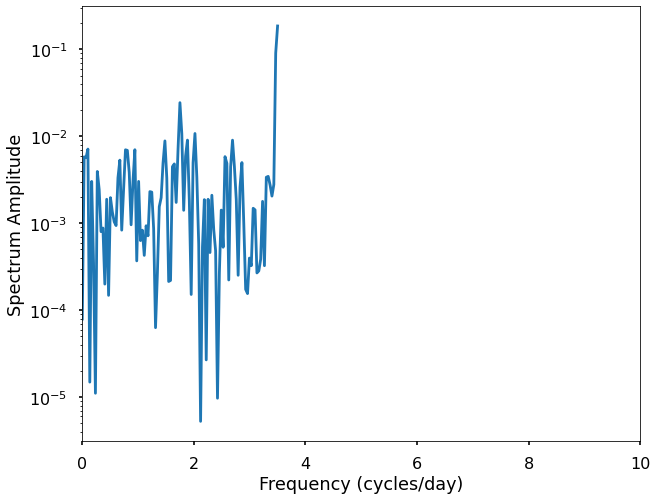

In [ ]:
f, Pxx = signal.periodogram(df.norm_avg_price, fs = 7, window='hanning', scaling='spectrum')
plt.figure(figsize = (10, 8))
plt.plot(f, Pxx)
plt.xlim(0, 10)
plt.yscale('log')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Spectrum Amplitude')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Autocorrelation')

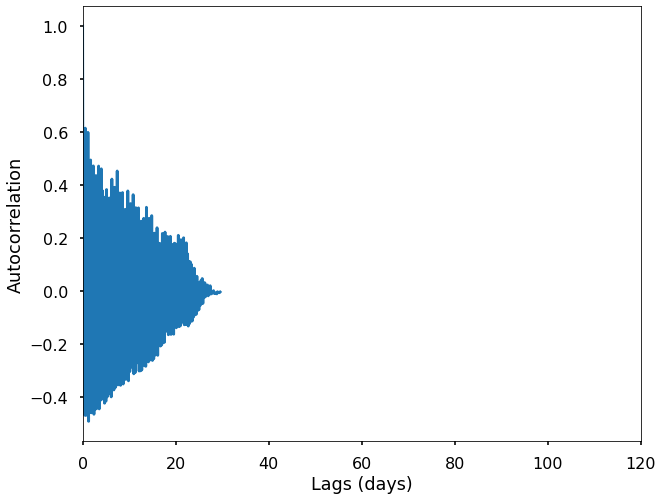

In [ ]:
acf = sm.tsa.acf(df.norm_avg_price, nlags=len(df.norm_avg_price))
plt.figure(figsize = (10, 8))
lag = arange(len(df.norm_avg_price)) / 7.
plt.plot(lag, acf)
plt.xlim((0, 120))
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

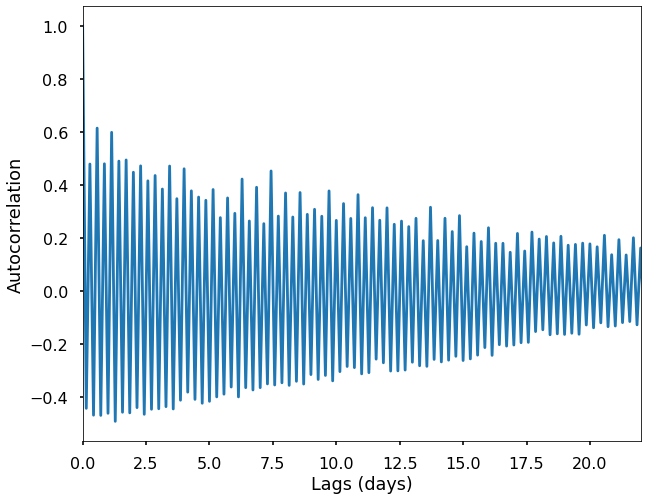

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(lag, acf)
plt.xlim((0, 22))
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation')

In [ ]:
var, mean = df.var(), df.mean()
periodicity_check = (var - mean) / (var + mean)
if int(round(periodicity_check, 0)) == -1:
    print("Signal is periodic")
else:
    print("Signal does not have periodicity")

Signal is periodic


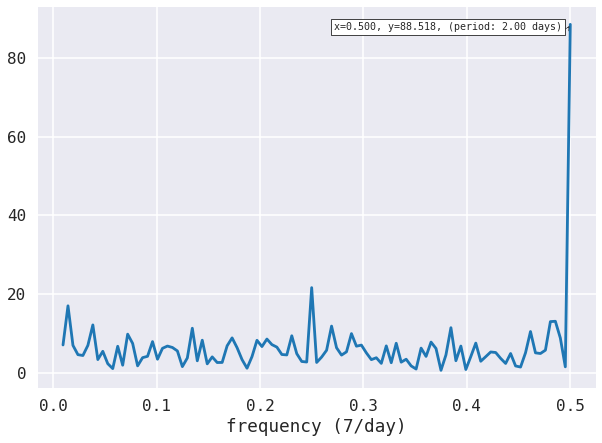

In [ ]:
nobs = len(df['ty_div_avg_unit_price'])
price_ft = np.abs(rfft(df['ty_div_avg_unit_price']))
price_freq = rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(price_freq[2:], price_ft[2: ])
annot_max(price_freq[2:], price_ft[2: ])
    
plt.xlabel('frequency (7/day)')
plt.show()

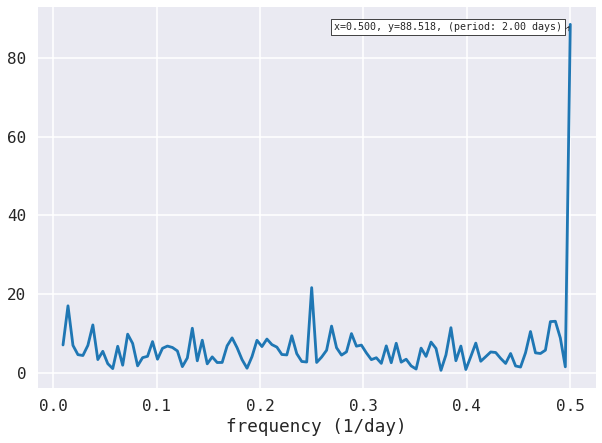

In [ ]:
nobs = len(df['ty_div_avg_unit_price'])
price_ft = np.abs(rfft(df['ty_div_avg_unit_price']))
price_freq = rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(price_freq[2:], price_ft[2: ])
annot_max(price_freq[2:], price_ft[2: ])
    
plt.xlabel('frequency (1/day)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


array([           inf, 2.00000000e-03, 1.00000000e-03, 6.66666667e-04,
       5.00000000e-04, 4.00000000e-04, 3.33333333e-04, 2.85714286e-04,
       2.50000000e-04, 2.22222222e-04, 2.00000000e-04, 1.81818182e-04,
       1.66666667e-04, 1.53846154e-04, 1.42857143e-04, 1.33333333e-04,
       1.25000000e-04, 1.17647059e-04, 1.11111111e-04, 1.05263158e-04,
       1.00000000e-04, 9.52380952e-05, 9.09090909e-05, 8.69565217e-05,
       8.33333333e-05, 8.00000000e-05, 7.69230769e-05, 7.40740741e-05,
       7.14285714e-05, 6.89655172e-05, 6.66666667e-05, 6.45161290e-05,
       6.25000000e-05, 6.06060606e-05, 5.88235294e-05, 5.71428571e-05,
       5.55555556e-05, 5.40540541e-05, 5.26315789e-05, 5.12820513e-05,
       5.00000000e-05, 4.87804878e-05, 4.76190476e-05, 4.65116279e-05,
       4.54545455e-05, 4.44444444e-05, 4.34782609e-05, 4.25531915e-05,
       4.16666667e-05, 4.08163265e-05, 4.00000000e-05, 3.92156863e-05,
       3.84615385e-05, 3.77358491e-05, 3.70370370e-05, 3.63636364e-05,
      

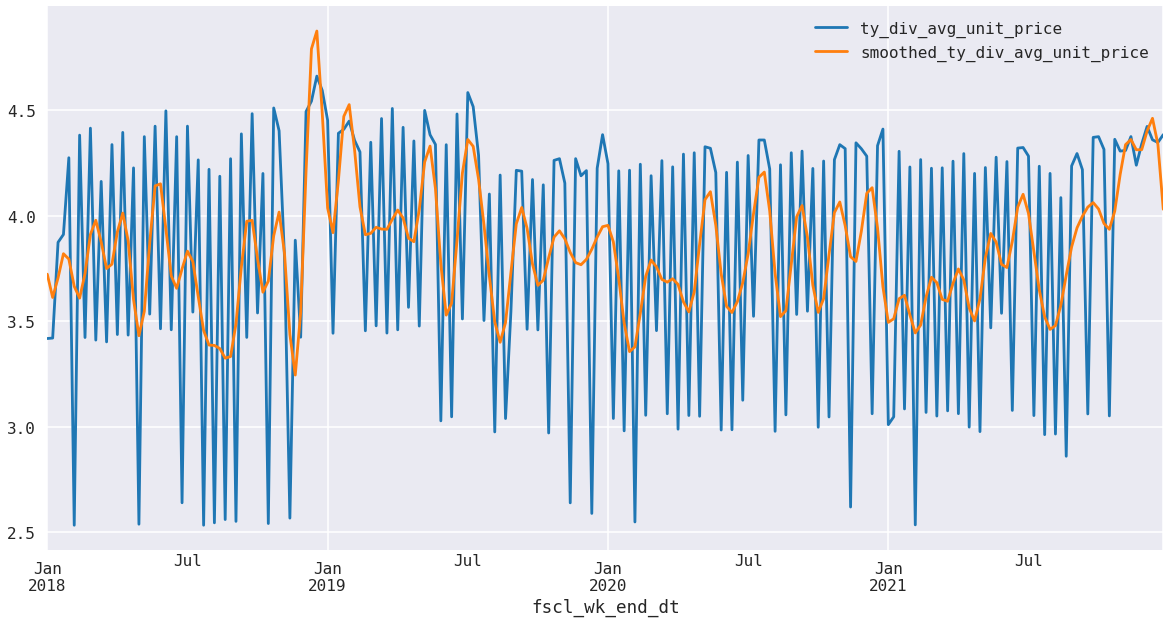

In [ ]:
df['smoothed_ty_div_avg_unit_price'] = low_pass(df['ty_div_avg_unit_price'])

'''
fig = plt.figure(figsize=(40,14))
plt.xlabel('date',fontsize=40, labelpad=25)
plt.ylabel('temperature [°C]',fontsize=40, labelpad=25)
plt.plot(df['temperature'], linewidth=1)
plt.plot(df['temperature_smoothed'], linewidth=5)
plt.legend(['Real value','FFT smoothing'], prop={'size': 20})
plt.title('',fontsize=40, pad=30)
                                                 
plt.show()

fig = plt.figure(figsize=(40,14))
plt.xlabel('date',fontsize=40, labelpad=25)
plt.ylabel('temperature [°C]',fontsize=40, labelpad=25)
plt.plot(df.loc[df.index > '2018']['temperature'], linewidth=1)
plt.plot(df.loc[df.index > '2018']['temperature_smoothed'], linewidth=5)
plt.legend(['Real value','FFT smoothing'], prop={'size': 20})
plt.title('',fontsize=40, pad=30)
                                                 
plt.show()
'''
df.plot(figsize=(20,10))

In [ ]:
df

,ty_div_avg_unit_price,smoothed_ty_div_avg_unit_price
fscl_wk_end_dt,,
2018-01-06,3.418555,3.723385
2018-01-13,3.420692,3.613111
2018-01-20,3.874394,3.706029
2018-01-27,3.911574,3.820382
2018-02-03,4.275081,3.794911
...,...,...
2021-11-27,4.340388,4.313339
2021-12-04,4.423389,4.401934
2021-12-11,4.360195,4.461903


In [ ]:
pd.to_datetime(pd.date_range(start=str(2015), end=str(2015+1), freq='W-SAT').strftime('%Y-%m-%d').tolist()[0])

Timestamp('2015-01-03 00:00:00')

In [ ]:
!pip install periodicity

     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 922 kB 42.2 MB/s 
     |████████████████████████████████| 407 kB 49.6 MB/s 
